<a href="https://colab.research.google.com/github/SweathaPappachan/DTTE-SweathaPappachan/blob/main/Project/ClassifyImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify Images using Python And Machine Learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

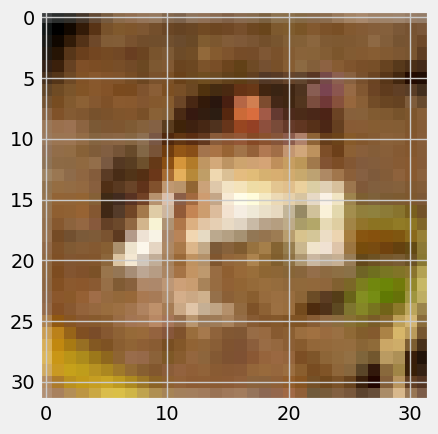

In [6]:
img = plt.imshow(x_train[index])

In [7]:
print('The image label is:', y_train[index])

The image label is: [6]


In [12]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]
y_train_index = int(y_train[index])
print('The image class is:', classification[y_train_index])

The image class is: frog


In [14]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [23]:
model = Sequential()

model.add( Conv2D(32, (5,5), activation ='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (5,5), activation ='relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1000,activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(500,activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(250,activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10,activation = 'softmax'))

In [24]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [25]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 89s 556ms/step - loss: 1.9237 - accuracy: 0.2702 - val_loss: 1.5742 - val_accuracy: 0.4227
Epoch 2/10
157/157 [==============================] - 84s 530ms/step - loss: 1.5230 - accuracy: 0.4400 - val_loss: 1.3410 - val_accuracy: 0.5210
Epoch 3/10
157/157 [==============================] - 88s 563ms/step - loss: 1.3465 - accuracy: 0.5174 - val_loss: 1.2453 - val_accuracy: 0.5593
Epoch 4/10
157/157 [==============================] - 72s 457ms/step - loss: 1.2475 - accuracy: 0.5578 - val_loss: 1.1654 - val_accuracy: 0.5849
Epoch 5/10
157/157 [==============================] - 68s 434ms/step - loss: 1.1645 - accuracy: 0.5872 - val_loss: 1.1243 - val_accuracy: 0.6074
Epoch 6/10
157/157 [==============================] - 62s 395ms/step - loss: 1.0897 - accuracy: 0.6161 - val_loss: 1.1307 - val_accuracy: 0.6078
Epoch 7/10
157/157 [==============================] - 66s 419ms/step - loss: 1.0180 - accuracy: 0.6403 - val_loss: 1.0494 - val_ac

In [26]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9811 - accuracy: 0.6597


0.6596999764442444

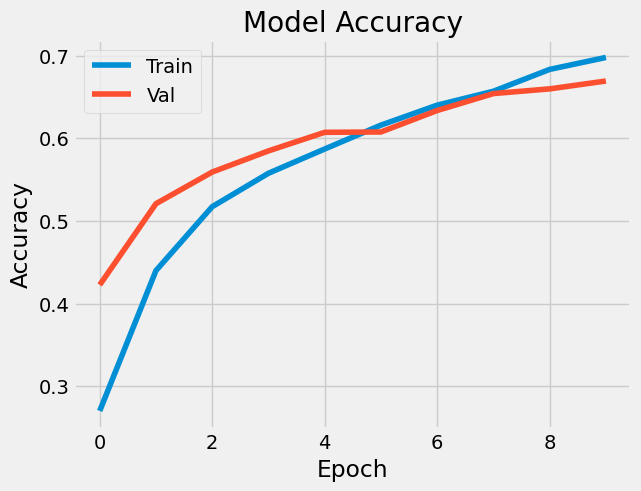

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

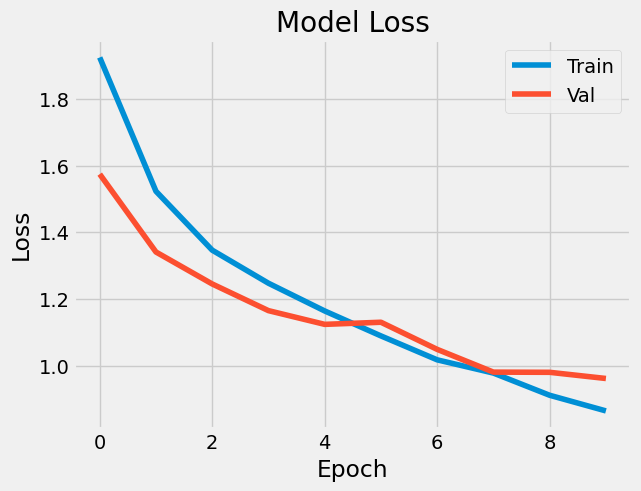

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

In [52]:
from google.colab import files
upload = files.upload()

Saving cat2.jpg to cat2.jpg


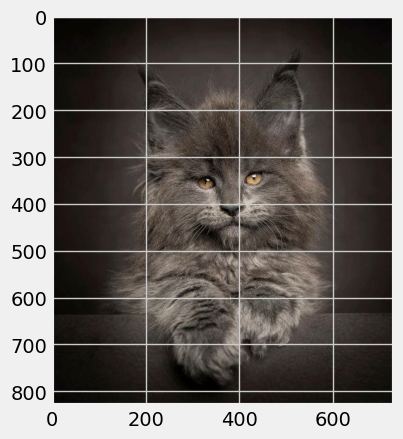

In [53]:
new_image = plt.imread('cat2.jpg')
img = plt.imshow(new_image)

In [44]:
!pip install scikit-learn
!pip install scikit-image

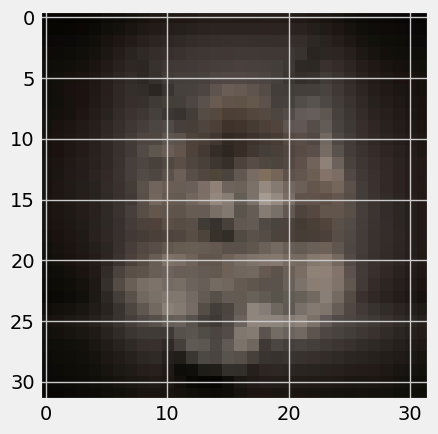

In [54]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

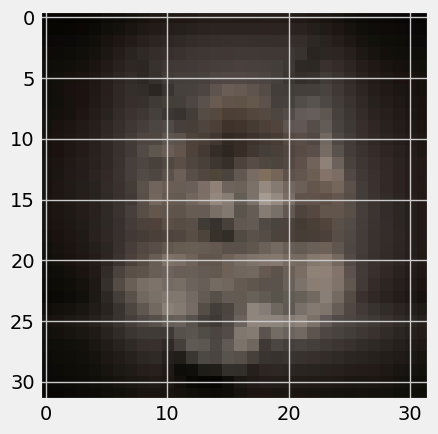

In [55]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [56]:
predictions = model.predict(np.array([resized_image]))

predictions

1/1 [==============================] - 0s 40ms/step


array([[0.00170588, 0.00117569, 0.07265899, 0.542561  , 0.0551725 ,
        0.14499108, 0.16854943, 0.00499697, 0.00623908, 0.00194943]],
      dtype=float32)

In [57]:
from re import I
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[3, 6, 5, 2, 4, 8, 7, 9, 0, 1]


In [58]:
for i in range (5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%')

cat : 54.26 %
frog : 16.85 %
dog : 14.5 %
bird : 7.27 %
deer : 5.52 %
